# **`Clustering-Based Customer Segmentation for E-Commerce Personalization`**

## Problem Statement

The goal of this project is to **cluster customers into meaningful segments** based on multiple behavioral and demographic factors.  

We will use features such as:  
- **Demographics** (e.g., Age)  
- **Purchase Behavior** (e.g., Total Purchase, Discounts Availed)  
- **Discount Usage** (e.g., Coupon Discounts, Card Discounts, Total Discount %)  
- **Loyalty Engagement** (e.g., Loyalty Tier, Points Redeemed, Membership Status)  
- **Delivery Experience** (e.g., Delivery Days, Shipping Cost)  
- **Customer Satisfaction** (e.g., Experience Rating)  

By clustering customers, we aim to:  
- **Personalize marketing strategies** by identifying customer groups with similar purchase/discount behaviors.  
- **Optimize loyalty programs** by understanding engagement across different customer tiers.  
- **Reduce churn** by detecting dissatisfied or low-engagement customers.  

This clustering approach will allow the business to build **data-driven customer segments** that improve customer retention, satisfaction, and profitability.  


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score 

In [24]:
df= pd.read_csv('sales.csv')


In [25]:
pd.set_option('display.max_columns',None)

In [26]:
df.head()

,user_id,age,sex,phone_number,joined_date,country,payment_method,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,tier_discount_percentage,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase,total_discount,total_purchase_after_discount,transaction_id,payment_status,payment_date,payment_time,purchased_date,purchased_time,product_category,purchase_medium,return_status,refund_amount,return_date,order_id,released_date,estimated_delivery_date,received_date,total_delivery_days,shipping_method,shipping_cost,tracking_number,customer_exp_rating
0,****980545,22,M,63**409216**,2023-02-14,Philippines,maya,1,1,2.0,5.0,NaN,5,10,1168,116.80,1051.20,***72935436,paid,2024-03-31,21:37:17,2024-03-31,21:37:17,pet supplies,online,not returned,0,NaN,***621668,2024-04-03,2024-04-07,2024-04-07,8,standard,203,***5E7HOXAW93,3
1,****906406,23,M,63**369756**,2024-04-19,Philippines,visa_c,0,0,NaN,NaN,2.0,2,4,4617,184.68,4432.32,***68415111,paid,2024-04-24,18:26:06,2024-04-24,18:26:06,music,in-store,not returned,0,NaN,***002517,2024-04-26,2024-05-03,2024-05-04,6,standard,291,***R5NLL0ARWI,1
2,****860958,19,F,63**558004**,2023-03-03,Philippines,gcash,0,0,NaN,NaN,NaN,2,2,7526,150.52,7375.48,***52520094,paid,2024-01-26,15:34:00,2024-01-26,15:34:00,health,online,not returned,0,NaN,***050582,2024-01-28,2024-01-31,2024-02-01,11,standard,74,***EOVA6EJ4QO,1
3,****845150,58,O,63**783910**,2024-04-18,Philippines,otc,0,0,NaN,NaN,NaN,2,2,1300,26.00,1274.00,***26122828,paid,2024-06-02,20:03:12,2024-06-02,20:03:12,movies,in-store,not returned,0,NaN,***110492,2024-06-09,2024-06-15,2024-06-13,8,express,82,***WKCU4XAR9B,1
4,****664897,37,O,63**600892**,2021-09-29,Philippines,visa_d,0,0,NaN,NaN,NaN,2,2,8480,169.60,8310.40,***66502984,paid,2022-07-07,22:14:04,2022-07-07,22:14:04,clothing,in-store,not returned,0,NaN,***201483,2022-07-08,2022-07-12,2022-07-09,14,standard,51,***5DEMJF3UCZ,5


In [27]:
df.tail()

,user_id,age,sex,phone_number,joined_date,country,payment_method,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,tier_discount_percentage,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase,total_discount,total_purchase_after_discount,transaction_id,payment_status,payment_date,payment_time,purchased_date,purchased_time,product_category,purchase_medium,return_status,refund_amount,return_date,order_id,released_date,estimated_delivery_date,received_date,total_delivery_days,shipping_method,shipping_cost,tracking_number,customer_exp_rating
382418,****300037,30,O,63**379179**,2022-03-20,Philippines,grabpay,0,0,NaN,NaN,NaN,2,2,5750,115.00,5635.00,***39916819,paid,2024-06-07,11:28:34,2024-06-07,11:28:34,pet supplies,online,not returned,0,NaN,***025200,2024-06-11,2024-06-13,2024-06-12,10,express,210,***3QPIC2XR30,1
382419,****260855,34,O,63**733642**,2022-10-12,Philippines,maya,1,0,1.0,3.0,NaN,3,6,439,26.34,412.66,***96186696,paid,2022-11-12,14:32:43,2022-11-12,14:32:43,pet supplies,in-store,not returned,0,NaN,***627156,2022-11-18,2022-11-22,2022-11-21,11,standard,155,***67DDXCKCLL,1
382420,****953217,50,M,63**868843**,2021-06-27,Philippines,amex,0,0,NaN,NaN,1.0,3,4,4605,184.20,4420.80,***47841999,paid,2022-07-25,04:09:04,2022-07-25,04:09:04,jewelry,in-store,not returned,0,NaN,***147206,2022-07-28,2022-07-29,2022-07-27,3,standard,246,***3QUHLZDFTG,3
382421,****196851,26,M,63**333114**,2022-08-24,Philippines,coinsph,1,2,3.0,7.0,NaN,3,10,2504,250.40,2253.60,***63968983,paid,2023-06-27,12:52:41,2023-06-27,12:52:41,video games,in-store,not returned,0,NaN,***891420,2023-07-03,2023-07-04,2023-07-01,8,express,258,***ONNPLJ5925,4
382422,****220899,51,F,63**625654**,2024-06-29,Philippines,mastercard_d,1,7,3.0,7.0,NaN,1,8,7983,638.64,7344.36,***80520649,paid,2024-12-09,11:59:29,2024-12-09,11:59:29,video games,online,not returned,0,NaN,***421068,2024-12-15,2024-12-20,2024-12-20,5,express,244,***OW2HZD5KLC,4


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382423 entries, 0 to 382422
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        382423 non-null  object 
 1   age                            382423 non-null  int64  
 2   sex                            382423 non-null  object 
 3   phone_number                   382423 non-null  object 
 4   joined_date                    382423 non-null  object 
 5   country                        382423 non-null  object 
 6   payment_method                 382423 non-null  object 
 7   loyalty_program_member         382423 non-null  int64  
 8   loyalty_points_redeemed        382423 non-null  int64  
 9   loyalty_tier                   191126 non-null  float64
 10  tier_discount_percentage       191126 non-null  float64
 11  card_discount_percentage       88589 non-null   float64
 12  coupon_discount_percentage    

In [29]:
df.describe()

,age,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,tier_discount_percentage,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase,total_discount,total_purchase_after_discount,refund_amount,return_date,total_delivery_days,shipping_cost,customer_exp_rating
count,382423.000000,382423.000000,382423.000000,191126.000000,191126.000000,88589.000000,382423.000000,382423.000000,382423.000000,382423.000000,382423.000000,382423.0,0.0,382423.000000,382423.000000,382423.000000
mean,38.972808,0.499776,2.259464,2.501753,6.254419,2.993634,2.500265,6.319557,5030.485462,317.719726,4712.765736,0.0,NaN,7.491717,175.037330,3.002795
std,12.390457,0.500001,3.031826,1.118606,2.587818,1.414830,1.706888,4.258269,2871.789926,305.853472,2702.065875,0.0,NaN,3.302425,72.496094,1.414959
min,18.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,50.000000,0.000000,42.120000,0.0,NaN,-1.000000,50.000000,1.000000
25%,28.000000,0.000000,0.000000,2.000000,5.000000,2.000000,1.000000,3.000000,2543.000000,80.400000,2376.900000,0.0,NaN,5.000000,112.000000,2.000000
50%,39.000000,0.000000,0.000000,3.000000,7.000000,3.000000,2.000000,5.000000,5037.000000,226.200000,4706.300000,0.0,NaN,7.000000,175.000000,3.000000
75%,50.000000,1.000000,5.000000,4.000000,10.000000,4.000000,4.000000,9.000000,7517.000000,464.800000,7023.350000,0.0,NaN,10.000000,238.000000,4.000000
max,60.000000,1.000000,9.000000,4.000000,10.000000,5.000000,5.000000,20.000000,9999.000000,1997.000000,9999.000000,0.0,NaN,16.000000,300.000000,5.000000


# Data Preprocessing

### Handling Missing Data

In [30]:
df.isnull().sum()

user_id                               0
age                                   0
sex                                   0
phone_number                          0
joined_date                           0
country                               0
payment_method                        0
loyalty_program_member                0
loyalty_points_redeemed               0
loyalty_tier                     191297
tier_discount_percentage         191297
card_discount_percentage         293834
coupon_discount_percentage            0
total_discount_percentage             0
total_purchase                        0
total_discount                        0
total_purchase_after_discount         0
transaction_id                        0
payment_status                        0
payment_date                          0
payment_time                          0
purchased_date                        0
purchased_time                        0
product_category                      0
purchase_medium                       0


- Only four columns are having missing values


In [31]:
df['loyalty_tier'].value_counts(dropna=False)

loyalty_tier
NaN    191297
4.0     47956
1.0     47729
2.0     47726
3.0     47715
Name: count, dtype: int64

In [32]:
df['loyalty_tier'] = df['loyalty_tier'].fillna(0)

In [33]:
df['tier_discount_percentage'].value_counts(dropna=False)

tier_discount_percentage
NaN     191297
10.0     47956
3.0      47729
5.0      47726
7.0      47715
Name: count, dtype: int64

In [34]:
df['tier_discount_percentage'] = df['tier_discount_percentage'].fillna(0)

In [35]:
df['card_discount_percentage'].value_counts(dropna=False)

card_discount_percentage
NaN    293834
1.0     17842
2.0     17776
3.0     17722
5.0     17647
4.0     17602
Name: count, dtype: int64

In [36]:
df['card_discount_percentage'] = df['card_discount_percentage'].fillna(0)

In [37]:
df['return_date'].value_counts()

Series([], Name: count, dtype: int64)

In [38]:
df = df.drop(columns=['return_date'])

- **loyalty_tier**, **tier_discount_percentage**, **card_discount_percentage** columns are having missing values imputed with 0 because large number of values are missing and missing values indicates no tier or 0 % discount.
- **return_date** column has all missing values so it is dropped.

### Dropping Irrelevant columns(id columns) and columns with unique count = 1

In [39]:
for col in df.columns:
    if df[col].nunique()>1:
        continue
    else:
        print(df[col].value_counts())
        print("")


country
Philippines    382423
Name: count, dtype: int64

payment_status
paid    382423
Name: count, dtype: int64

return_status
not returned    382423
Name: count, dtype: int64

refund_amount
0    382423
Name: count, dtype: int64



In [40]:
df = df.drop(columns=['return_status','country','payment_status','refund_amount'])

In [41]:
# Dropping ID columns
df = df.drop(columns=['user_id','phone_number','transaction_id','order_id','tracking_number'])

- columns 'return_status','country','payment_status','refund_amount' dropped because of ahving single value
- columns 'user_id','phone_number','transaction_id','order_id','tracking_number' were dropped beacause they were ID columns.

### Outlier Handling

In [42]:
df_clean=df.copy()

In [43]:
outlier_summary = {}
for col in df_clean.columns:
    if df_clean[col].dtype in ['int64', 'float64']:
                Q1 = df_clean[col].quantile(0.25)
                Q3 = df_clean[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5*IQR
                upper = Q3 + 1.5*IQR
                outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)].shape[0]
                outlier_summary[col] = outliers
outlier_report = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['outlier_count']).sort_values(by='outlier_count', ascending=False)
print(outlier_report)

                               outlier_count
card_discount_percentage               88589
total_discount                         13422
total_discount_percentage               1101
loyalty_points_redeemed                    0
loyalty_program_member                     0
age                                        0
tier_discount_percentage                   0
loyalty_tier                               0
coupon_discount_percentage                 0
total_purchase                             0
total_purchase_after_discount              0
total_delivery_days                        0
shipping_cost                              0
customer_exp_rating                        0


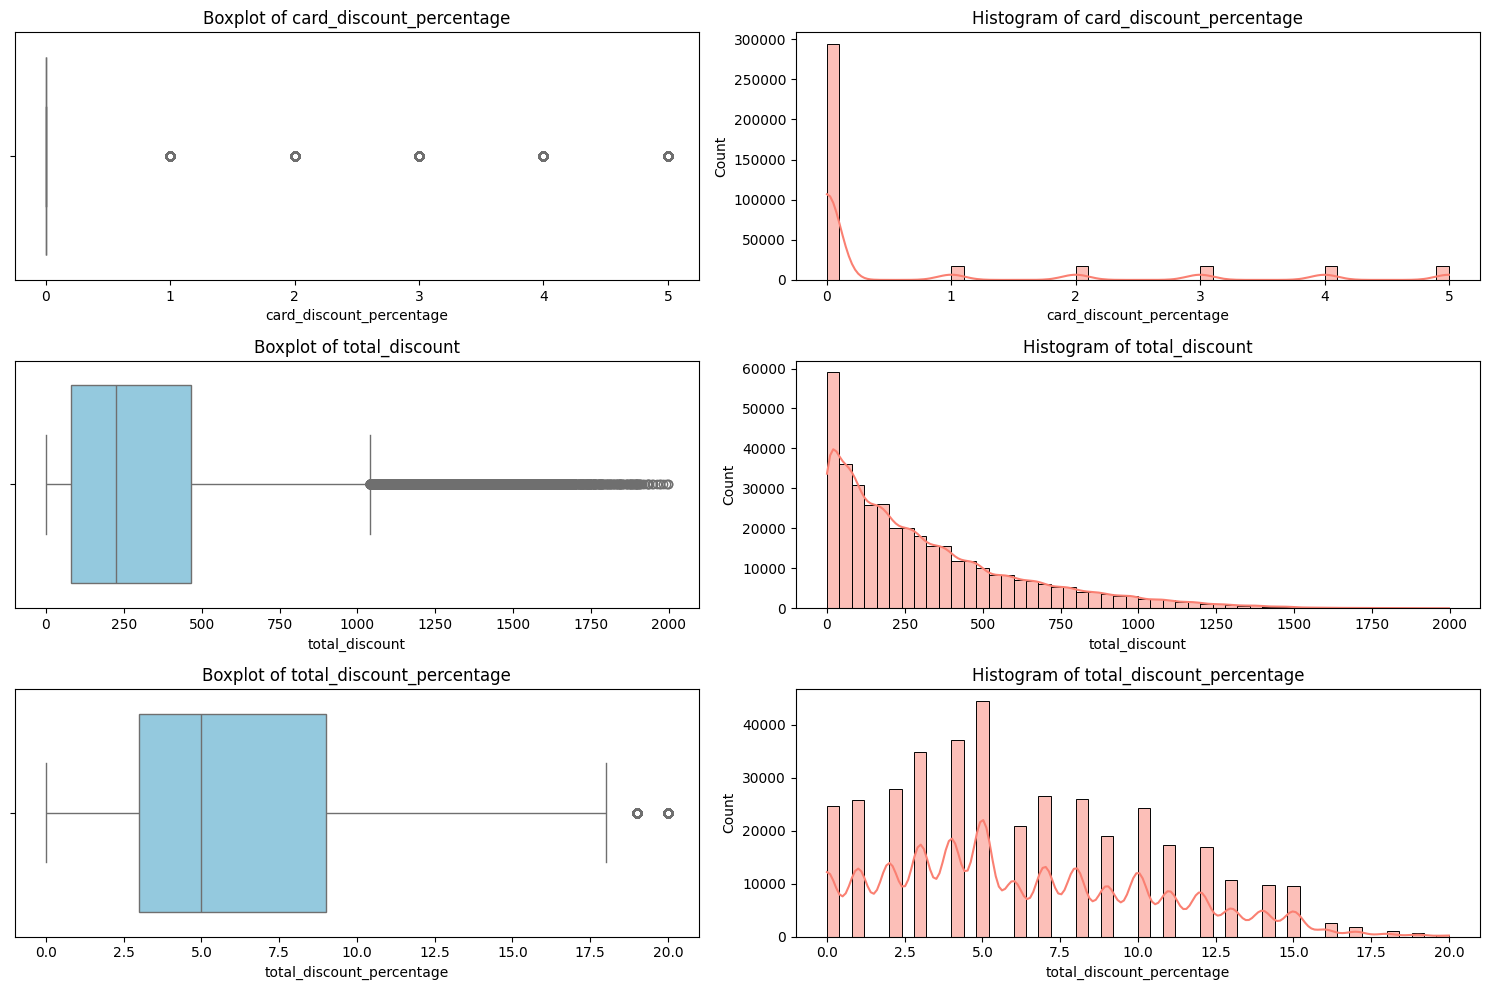

In [44]:
# Columns with significant outliers
outlier_cols = ['card_discount_percentage', 'total_discount', 'total_discount_percentage']

plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_cols, 1):
    # Boxplot
    plt.subplot(3, 2, 2*i - 1)
    sns.boxplot(x=df_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    
    # Histogram
    plt.subplot(3, 2, 2*i)
    sns.histplot(df_clean[col], bins=50, kde=True, color="salmon")
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()


In [45]:
def cap_outliers_iqr(df_clean, columns):
    df_clean = df_clean.copy()  # avoid modifying original df
    for col in columns:
        if df_clean[col].dtype in ['int64', 'float64']:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_clean[col] = df_clean[col].clip(lower, upper)
            print(f"{col}: capped values outside [{lower:.2f}, {upper:.2f}]")
    return df_clean

# Apply only to problematic columns
df_clean = cap_outliers_iqr(df_clean, ['total_discount_percentage','total_discount'])


total_discount_percentage: capped values outside [-6.00, 18.00]
total_discount: capped values outside [-496.20, 1041.40]


- **`card_discount_percentage`** → Large values are valid discount brackets (e.g., 1–5), so no capping was applied.  
- **`total_discount`** → Contained extreme skewness and large outliers. Applied **IQR-based capping** .  
- **`total_discount_percentage`** → Outliers above ~15–20% were capped using the **IQR method**.  

## Feature Engineering on Datetime columns

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382423 entries, 0 to 382422
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            382423 non-null  int64  
 1   sex                            382423 non-null  object 
 2   joined_date                    382423 non-null  object 
 3   payment_method                 382423 non-null  object 
 4   loyalty_program_member         382423 non-null  int64  
 5   loyalty_points_redeemed        382423 non-null  int64  
 6   loyalty_tier                   382423 non-null  float64
 7   tier_discount_percentage       382423 non-null  float64
 8   card_discount_percentage       382423 non-null  float64
 9   coupon_discount_percentage     382423 non-null  int64  
 10  total_discount_percentage      382423 non-null  int64  
 11  total_purchase                 382423 non-null  int64  
 12  total_discount                

In [47]:
datetime_cols = ['joined_date','payment_date','purchased_date','released_date',
                 'estimated_delivery_date','received_date']

for col in datetime_cols:
    df_clean[col] = pd.to_datetime(df_clean[col],errors='coerce')
    df_clean[f'{col}_dayofweek'] = df_clean[col].dt.dayofweek   # 0=Mon, 6=Sun
    df_clean[f'{col}_month'] = df_clean[col].dt.month
    df_clean[f'{col}_year'] = df_clean[col].dt.year
    df_clean[f'{col}_is_weekend'] = df_clean[col].dt.dayofweek.isin([5,6]).astype(int)

In [48]:
df_clean['delivery_time_days'] = (df_clean['received_date'] - df_clean['purchased_date']).dt.days
df_clean['estimated_vs_actual_delivery'] = (df_clean['received_date'] - df_clean['estimated_delivery_date']).dt.days
df_clean['membership_duration_days'] = (df_clean['purchased_date'] - df_clean['joined_date']).dt.days

In [49]:
time_cols = ['payment_time','purchased_time']
for col in time_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], format='%H:%M:%S', errors='coerce').dt.time
    df_clean[f'{col}_hour'] = pd.to_datetime(df_clean[col], format='%H:%M:%S', errors='coerce').dt.hour

df_clean.drop(columns=datetime_cols + time_cols, inplace=True)    

## Feature Selection

In [50]:
# Drop unnecessary columns based on domain knowledge
cols_to_drop = [ 
    'total_discount', 
    'total_purchase'
]

df_clean = df_clean.drop(columns=cols_to_drop)

# Verify remaining columns
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382423 entries, 0 to 382422
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 382423 non-null  int64  
 1   sex                                 382423 non-null  object 
 2   payment_method                      382423 non-null  object 
 3   loyalty_program_member              382423 non-null  int64  
 4   loyalty_points_redeemed             382423 non-null  int64  
 5   loyalty_tier                        382423 non-null  float64
 6   tier_discount_percentage            382423 non-null  float64
 7   card_discount_percentage            382423 non-null  float64
 8   coupon_discount_percentage          382423 non-null  int64  
 9   total_discount_percentage           382423 non-null  int64  
 10  total_purchase_after_discount       382423 non-null  float64
 11  product_category          

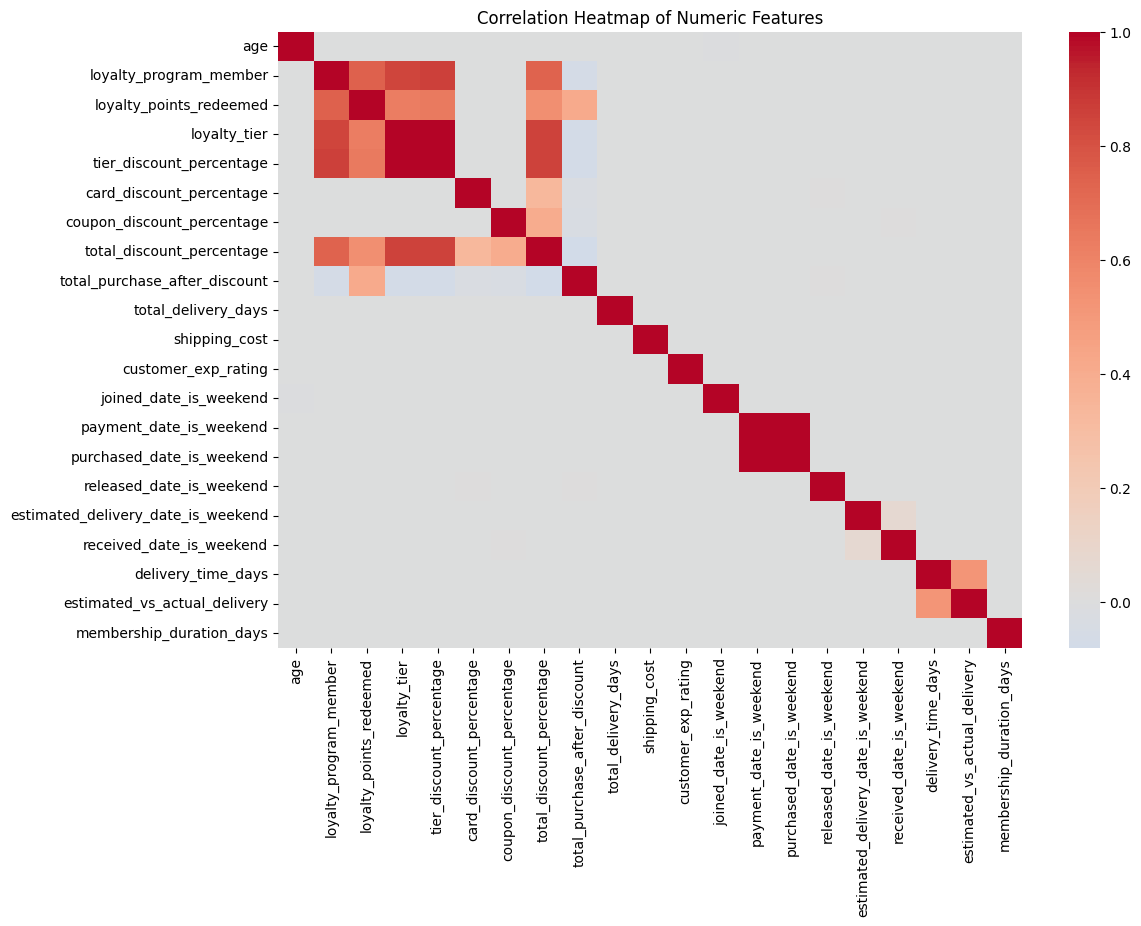

Highly correlated feature pairs (|corr| > 0.85):
purchased_date_is_weekend ↔ payment_date_is_weekend : 1.00
payment_date_is_weekend ↔ purchased_date_is_weekend : 1.00
tier_discount_percentage ↔ loyalty_tier : 1.00
loyalty_tier ↔ tier_discount_percentage : 1.00
loyalty_program_member ↔ tier_discount_percentage : 0.86
tier_discount_percentage ↔ loyalty_program_member : 0.86
tier_discount_percentage ↔ total_discount_percentage : 0.85
total_discount_percentage ↔ tier_discount_percentage : 0.85
total_discount_percentage ↔ loyalty_tier : 0.85
loyalty_tier ↔ total_discount_percentage : 0.85


In [51]:

# Select only numeric features
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Identify highly correlated pairs
threshold = 0.85
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)

# Filter out duplicates and self-correlations
high_corr = []

for (i, j), corr in corr_pairs.items():
    if i != j and abs(corr) > threshold:
        high_corr.append((i, j, corr))
print("Highly correlated feature pairs (|corr| > 0.85):")

for i, j, corr in high_corr:
    print(f"{i} ↔ {j} : {corr:.2f}")


In [52]:
# Drop redundant features
df_selected = df_clean.drop(columns=[
    "payment_date_is_weekend",   # duplicate with purchased_date_is_weekend
    "tier_discount_percentage"   # redundant with loyalty_tier & total_discount_percentage
])

print("Remaining columns after feature selection:")
print(df_selected.columns.tolist())


Remaining columns after feature selection:
['age', 'sex', 'payment_method', 'loyalty_program_member', 'loyalty_points_redeemed', 'loyalty_tier', 'card_discount_percentage', 'coupon_discount_percentage', 'total_discount_percentage', 'total_purchase_after_discount', 'product_category', 'purchase_medium', 'total_delivery_days', 'shipping_method', 'shipping_cost', 'customer_exp_rating', 'joined_date_dayofweek', 'joined_date_month', 'joined_date_year', 'joined_date_is_weekend', 'payment_date_dayofweek', 'payment_date_month', 'payment_date_year', 'purchased_date_dayofweek', 'purchased_date_month', 'purchased_date_year', 'purchased_date_is_weekend', 'released_date_dayofweek', 'released_date_month', 'released_date_year', 'released_date_is_weekend', 'estimated_delivery_date_dayofweek', 'estimated_delivery_date_month', 'estimated_delivery_date_year', 'estimated_delivery_date_is_weekend', 'received_date_dayofweek', 'received_date_month', 'received_date_year', 'received_date_is_weekend', 'delivery

## Encoding 

In [53]:
df_encoded = df_selected.copy()

# manual encoding
sex_mapping = {"M": 0, "F": 1, "O": 2}
df_encoded['sex'] = df_encoded["sex"].map(sex_mapping)

# one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['payment_method', 'product_category'],drop_first=True,dtype=int)

# Label encoding
le = LabelEncoder()
df_encoded['purchase_medium'] = le.fit_transform(df_encoded['purchase_medium'])
df_encoded['shipping_method'] = le.fit_transform(df_encoded['shipping_method'])

In [54]:
df_encoded.head()

,age,sex,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase_after_discount,purchase_medium,total_delivery_days,shipping_method,shipping_cost,customer_exp_rating,joined_date_dayofweek,joined_date_month,joined_date_year,joined_date_is_weekend,payment_date_dayofweek,payment_date_month,payment_date_year,purchased_date_dayofweek,purchased_date_month,purchased_date_year,purchased_date_is_weekend,released_date_dayofweek,released_date_month,released_date_year,released_date_is_weekend,estimated_delivery_date_dayofweek,estimated_delivery_date_month,estimated_delivery_date_year,estimated_delivery_date_is_weekend,received_date_dayofweek,received_date_month,received_date_year,received_date_is_weekend,delivery_time_days,estimated_vs_actual_delivery,membership_duration_days,payment_time_hour,purchased_time_hour,payment_method_bank_transfer,payment_method_cash,payment_method_coinsph,payment_method_gcash,payment_method_grabpay,payment_method_mastercard_c,payment_method_mastercard_d,payment_method_maya,payment_method_otc,payment_method_shopeepay,payment_method_visa_c,payment_method_visa_d,product_category_automotive,product_category_beauty,product_category_books,product_category_clothing,product_category_electronics,product_category_furniture,product_category_garden,product_category_groceries,product_category_health,product_category_home,product_category_jewelry,product_category_movies,product_category_music,product_category_office supplies,product_category_pet supplies,product_category_sports,product_category_tools,product_category_toys,product_category_video games
0,22,0,1,1,2.0,0.0,5,10,1051.20,1,8,1,203,3,1,2,2023,0,6,3,2024,6,3,2024,1,2,4,2024,0,6,4,2024,1,6,4,2024,1,7,0,411,21,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,23,0,0,0,0.0,2.0,2,4,4432.32,0,6,1,291,1,4,4,2024,0,2,4,2024,2,4,2024,0,4,4,2024,0,4,5,2024,0,5,5,2024,1,10,1,5,18,18,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,19,1,0,0,0.0,0.0,2,2,7375.48,1,11,1,74,1,4,3,2023,0,4,1,2024,4,1,2024,0,6,1,2024,1,2,1,2024,0,3,2,2024,0,6,1,329,15,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,58,2,0,0,0.0,0.0,2,2,1274.00,0,8,0,82,1,3,4,2024,0,6,6,2024,6,6,2024,1,6,6,2024,1,5,6,2024,1,3,6,2024,0,11,-2,45,20,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,37,2,0,0,0.0,0.0,2,2,8310.40,0,14,1,51,5,2,9,2021,0,3,7,2022,3,7,2022,0,4,7,2022,0,1,7,2022,0,5,7,2022,1,2,-3,281,22,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Scaling

In [55]:
df_scaled = df_encoded.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)


## Modelling

### K-means

k=4: Silhouette=0.0400, Davies-Bouldin=4.0406, Calinski-Harabasz=15764.79
k=5: Silhouette=0.0356, Davies-Bouldin=4.3639, Calinski-Harabasz=13263.97
k=6: Silhouette=0.0334, Davies-Bouldin=4.2886, Calinski-Harabasz=11578.09
k=7: Silhouette=0.0307, Davies-Bouldin=4.4989, Calinski-Harabasz=10415.64


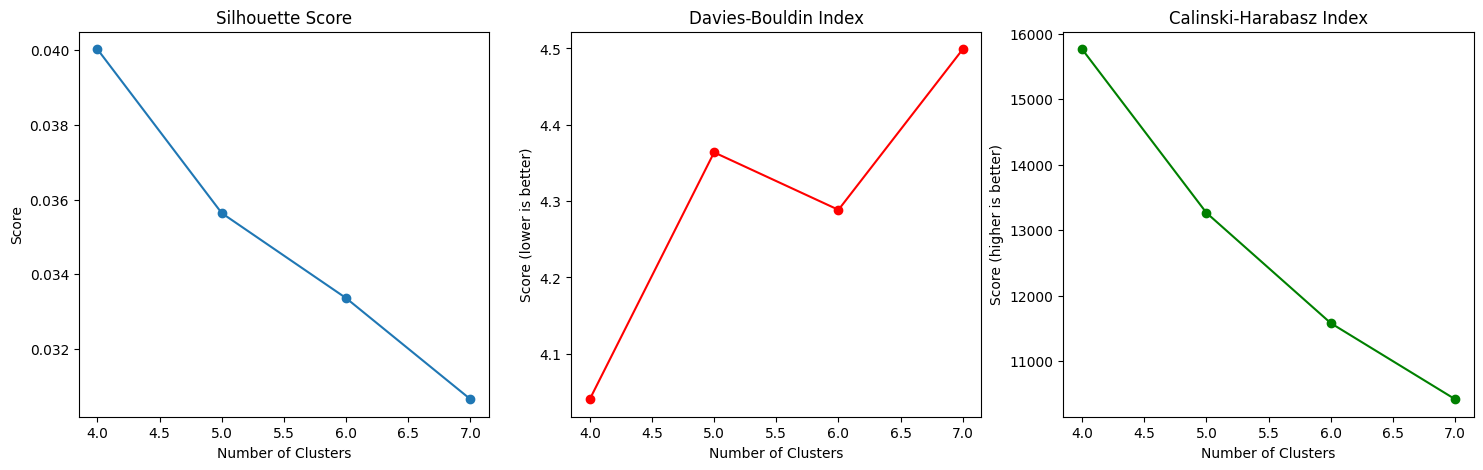

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Range of clusters to test
k_range = range(4, 8)

results = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    
    sil = silhouette_score(df_scaled, labels)
    db = davies_bouldin_score(df_scaled, labels)
    ch = calinski_harabasz_score(df_scaled, labels)
    
    results.append((k, sil, db, ch))
    print(f"k={k}: Silhouette={sil:.4f}, Davies-Bouldin={db:.4f}, Calinski-Harabasz={ch:.2f}")

# Convert to DataFrame for easier analysis
import pandas as pd
metrics_df = pd.DataFrame(results, columns=["k", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])

# Plot metrics for visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(metrics_df["k"], metrics_df["Silhouette"], marker='o')
axes[0].set_title("Silhouette Score")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Score")

axes[1].plot(metrics_df["k"], metrics_df["Davies-Bouldin"], marker='o', color="red")
axes[1].set_title("Davies-Bouldin Index")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Score (lower is better)")

axes[2].plot(metrics_df["k"], metrics_df["Calinski-Harabasz"], marker='o', color="green")
axes[2].set_title("Calinski-Harabasz Index")
axes[2].set_xlabel("Number of Clusters")
axes[2].set_ylabel("Score (higher is better)")

plt.show()


In [56]:
# Fit final KMeans with best k (say k=4)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)


In [63]:
df_scaled.columns

Index(['age', 'sex', 'loyalty_program_member', 'loyalty_points_redeemed',
       'loyalty_tier', 'card_discount_percentage',
       'coupon_discount_percentage', 'total_discount_percentage',
       'total_purchase_after_discount', 'purchase_medium',
       'total_delivery_days', 'shipping_method', 'shipping_cost',
       'customer_exp_rating', 'joined_date_dayofweek', 'joined_date_month',
       'joined_date_year', 'joined_date_is_weekend', 'payment_date_dayofweek',
       'payment_date_month', 'payment_date_year', 'purchased_date_dayofweek',
       'purchased_date_month', 'purchased_date_year',
       'purchased_date_is_weekend', 'released_date_dayofweek',
       'released_date_month', 'released_date_year', 'released_date_is_weekend',
       'estimated_delivery_date_dayofweek', 'estimated_delivery_date_month',
       'estimated_delivery_date_year', 'estimated_delivery_date_is_weekend',
       'received_date_dayofweek', 'received_date_month', 'received_date_year',
       'received_date

=== Cluster Sizes (Counts) ===
Cluster
1    102994
3    100158
0    100115
2     79156
Name: count, dtype: int64

=== Cluster Sizes (%) ===
Cluster
1    26.931958
3    26.190370
0    26.179126
2    20.698546
Name: proportion, dtype: float64

=== Numerical Summary ===


,age,loyalty_points_redeemed,loyalty_tier,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase_after_discount,total_delivery_days,shipping_cost,customer_exp_rating,membership_duration_days,delivery_time_days,estimated_vs_actual_delivery
Cluster,,,,,,,,,,,,,
0,-0.003556,0.799038,0.904124,0.021073,0.030868,0.801375,-0.010775,-0.002064,0.003398,-0.001693,0.018909,0.002492,-0.000288
1,0.001285,-0.057344,-0.065971,0.000424,0.002637,-0.053258,-0.033212,-0.002496,-0.001678,-0.003739,0.194113,-0.011880,-0.005009
2,0.000338,0.004296,-0.000223,-0.000653,-0.000622,-0.000432,0.000490,0.004375,-0.001068,0.004649,-0.297331,0.006353,0.005542
3,0.001966,-0.743122,-0.835721,-0.020984,-0.033076,-0.745924,0.044535,0.001172,-0.000827,0.001863,0.016474,0.004704,0.001059



=== sex ===


sex,-1.228643,-0.002795,1.223053
Cluster,,,
0,0.332318,0.334505,0.333177
1,0.331932,0.336146,0.331922
2,0.332003,0.331876,0.336121
3,0.330208,0.334981,0.334811



=== purchase_medium ===


purchase_medium,-1.003313,0.996698
Cluster,,
0,0.499745,0.500255
1,0.498777,0.501223
2,0.497777,0.502223
3,0.496955,0.503045



=== shipping_method ===


shipping_method,-1.003292,0.996718
Cluster,,
0,0.496229,0.503771
1,0.499680,0.500320
2,0.499520,0.500480
3,0.498203,0.501797



=== loyalty_program_member ===


loyalty_program_member,-0.999553,1.000447
Cluster,,
0,0.000000,1.000000
1,0.515574,0.484426
2,0.497688,0.502312
3,0.986451,0.013549



=== One-Hot Encoded Feature Summary (Proportions) ===


,payment_method_bank_transfer,payment_method_cash,payment_method_coinsph,payment_method_gcash,payment_method_grabpay,payment_method_mastercard_c,payment_method_mastercard_d,payment_method_maya,payment_method_otc,payment_method_shopeepay,payment_method_visa_c,payment_method_visa_d,product_category_automotive,product_category_beauty,product_category_books,product_category_clothing,product_category_electronics,product_category_furniture,product_category_garden,product_category_groceries,product_category_health,product_category_home,product_category_jewelry,product_category_movies,product_category_music,product_category_office supplies,product_category_pet supplies,product_category_sports,product_category_tools,product_category_toys,product_category_video games
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000053,-0.003229,-0.006442,-0.000923,-0.005190,0.015796,-0.006156,-0.002080,-0.003146,-0.009358,0.008326,0.001254,-0.004398,0.002575,0.000017,-0.000453,-0.005051,0.001168,0.000130,-0.005919,-0.001338,0.001972,-0.000785,0.004713,-0.001649,0.004952,-0.003151,-0.000593,0.003122,0.001510,0.002864
1,-0.002924,-0.005327,0.004215,0.002648,0.006410,0.001181,-0.002589,-0.002924,0.001105,0.002538,0.000916,-0.003189,0.005260,-0.003037,0.000667,-0.006426,0.002116,0.002242,0.003168,0.002702,0.001472,0.001423,0.003233,0.000607,-0.002416,-0.008593,0.000406,0.004477,-0.005342,-0.002683,0.000929
2,-0.001513,0.000095,0.004774,-0.000432,-0.001415,-0.005351,0.002059,0.001543,-0.000694,0.001164,-0.000090,-0.002283,0.003653,-0.000308,-0.004779,0.001314,0.000164,-0.002260,-0.002413,0.006077,-0.005213,-0.000574,-0.003893,-0.002814,0.002074,0.001618,0.000170,-0.002457,0.003928,0.005905,0.000876
3,0.004150,0.008630,-0.001668,-0.001459,-0.000286,-0.012774,0.007189,0.003866,0.002556,0.005824,-0.009193,0.003831,-0.003899,0.000792,0.003075,0.006023,0.002744,-0.001686,-0.001481,-0.001665,0.003943,-0.002981,0.000536,-0.003111,0.002494,0.002608,0.002597,-0.002070,-0.000731,-0.003417,-0.004510


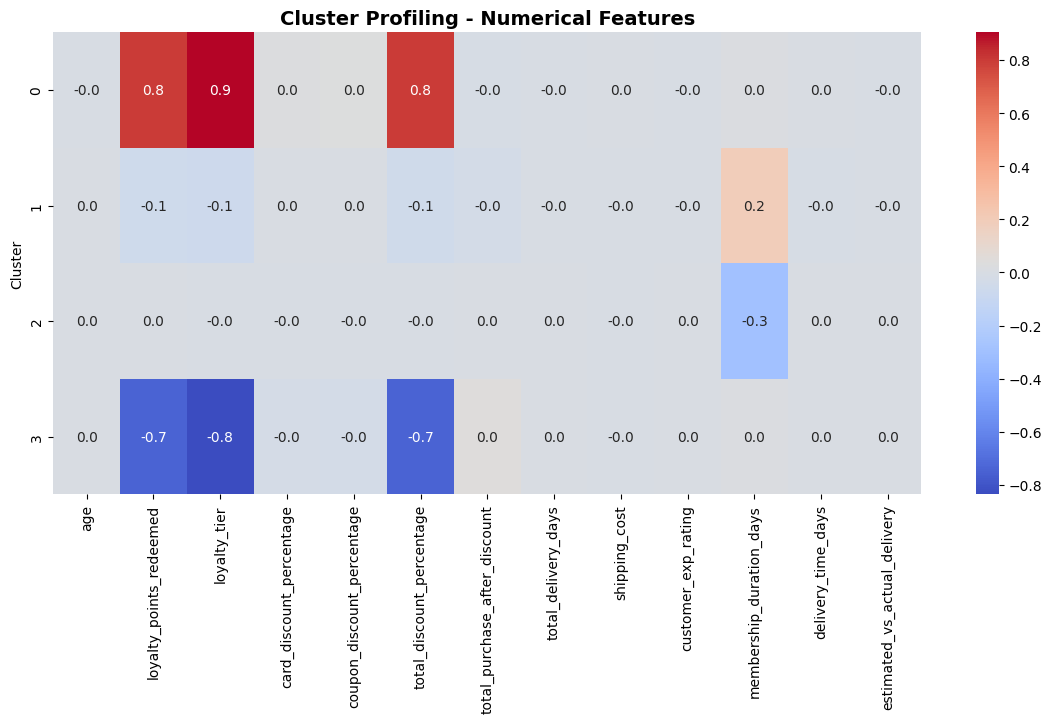

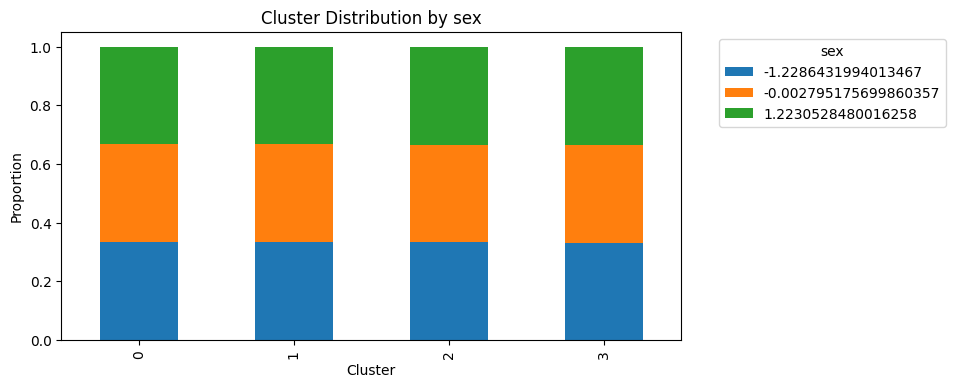

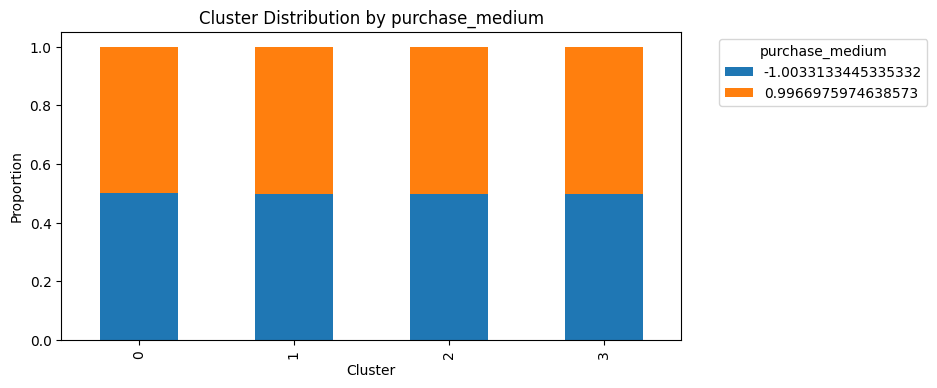

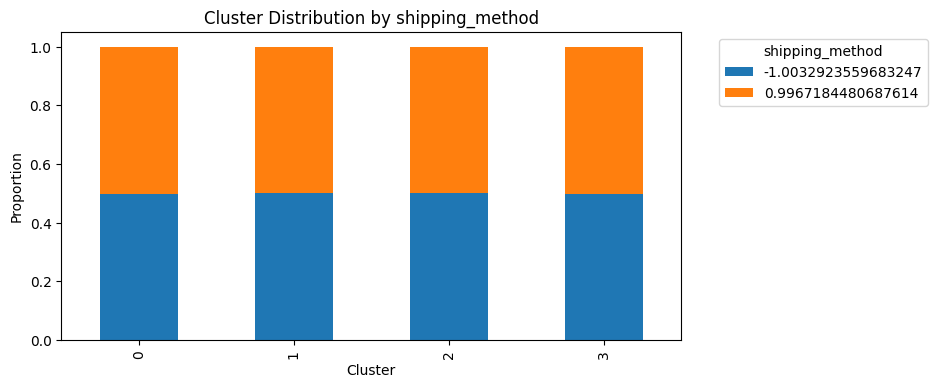

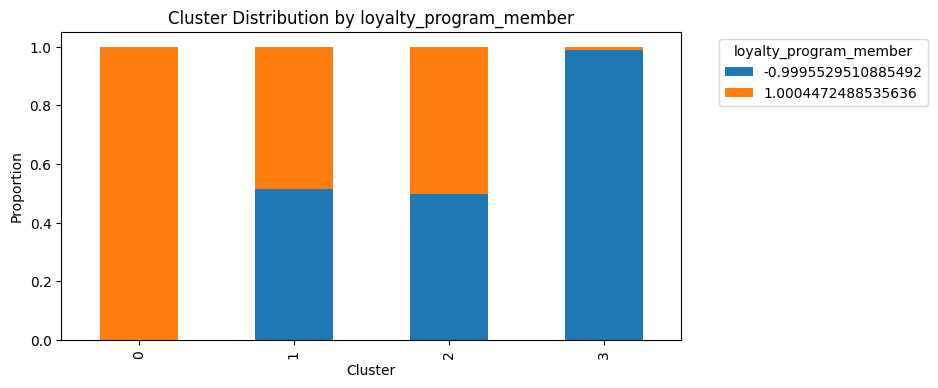

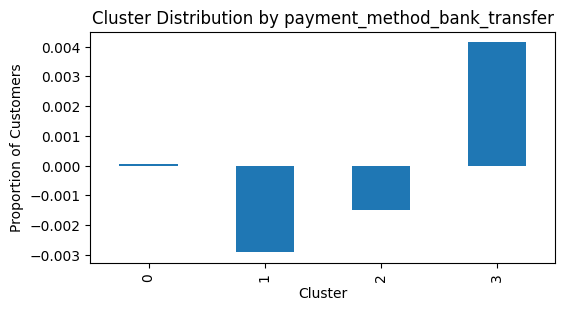

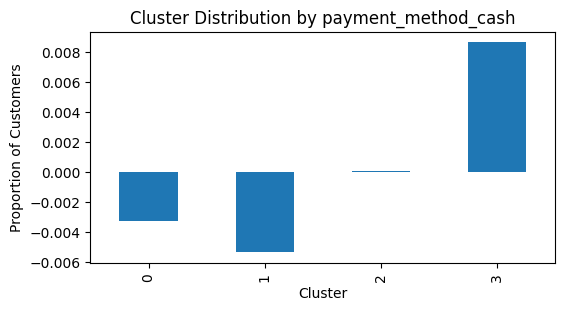

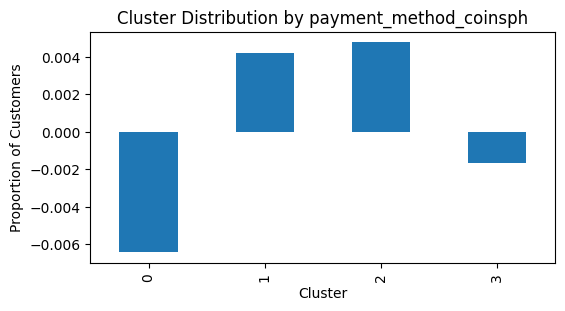

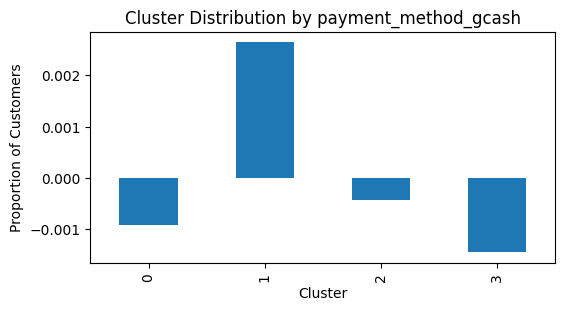

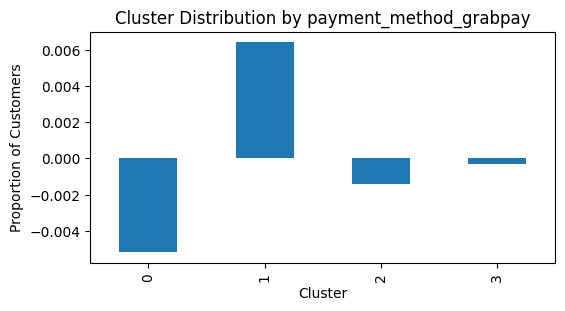

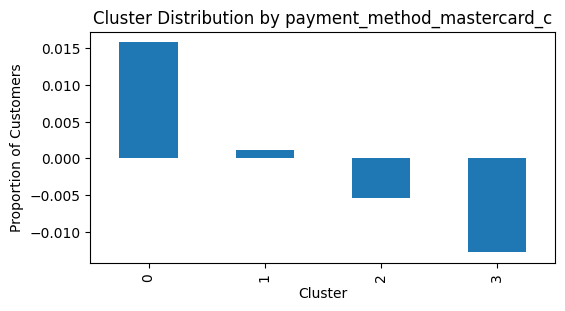

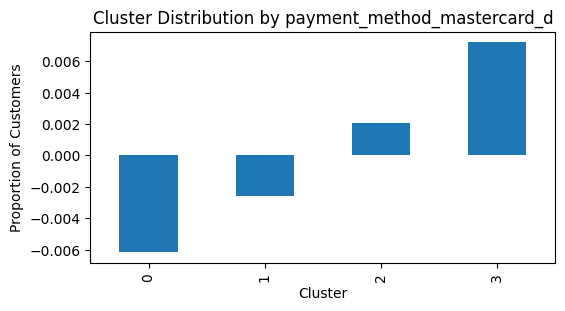

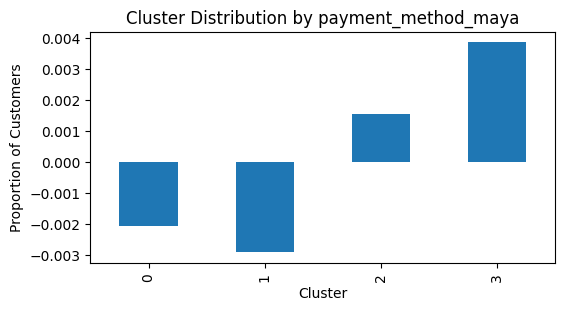

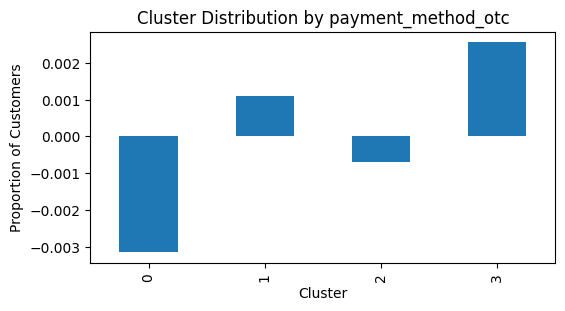

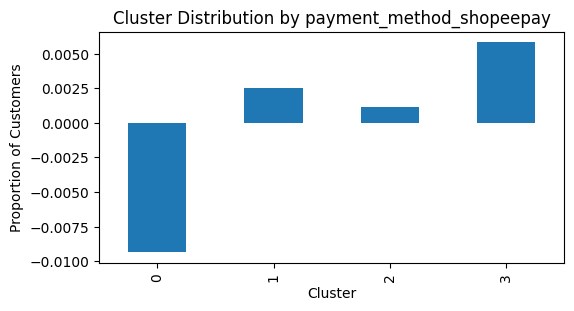

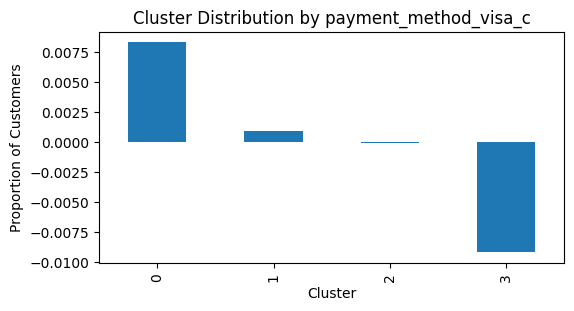

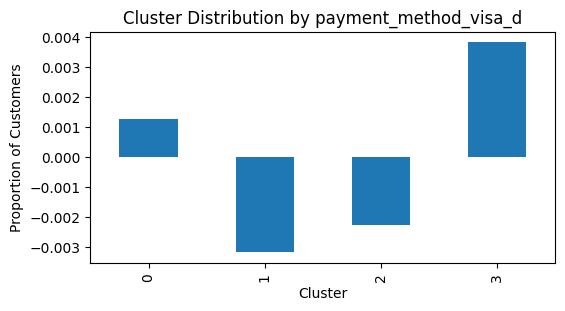

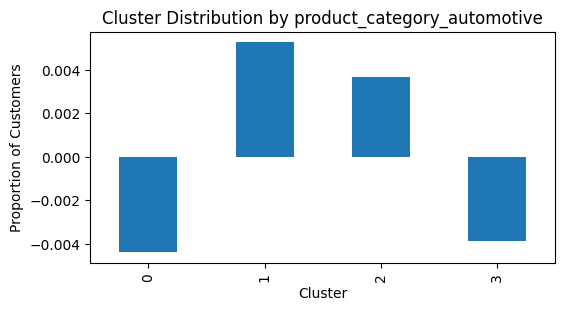

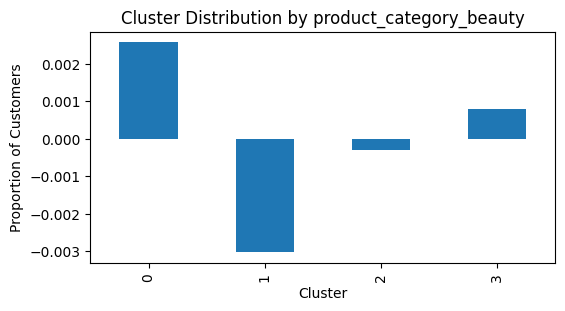

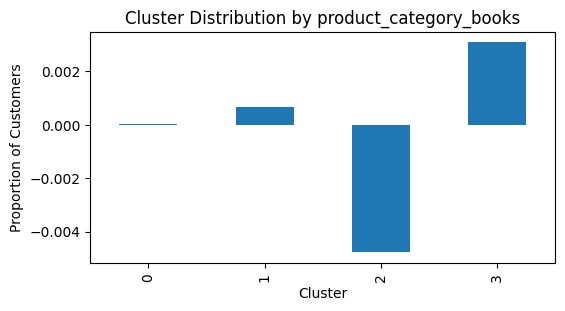

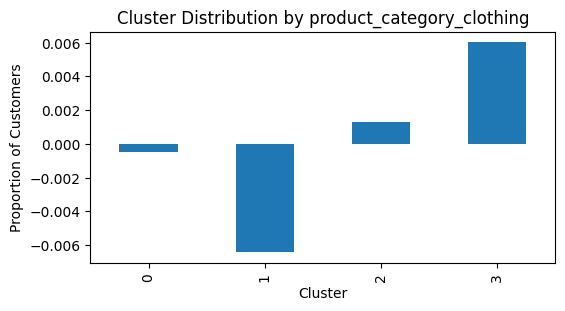

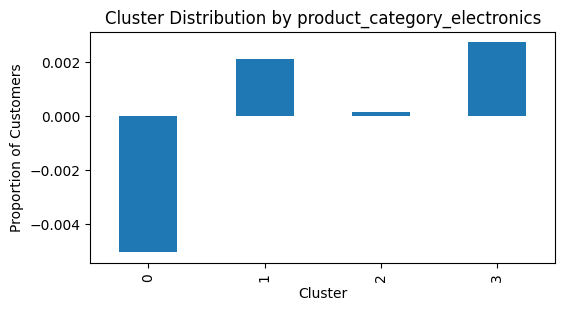

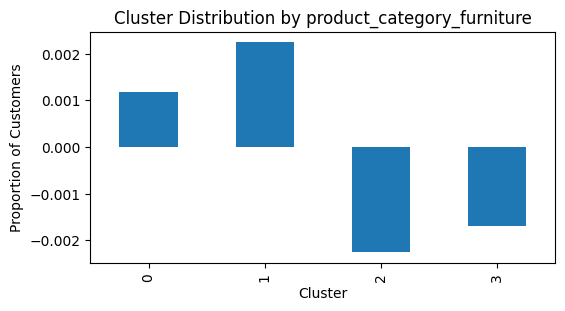

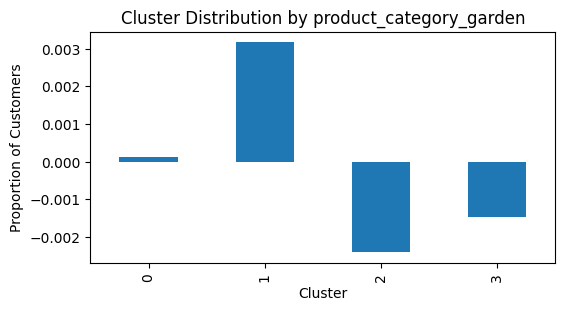

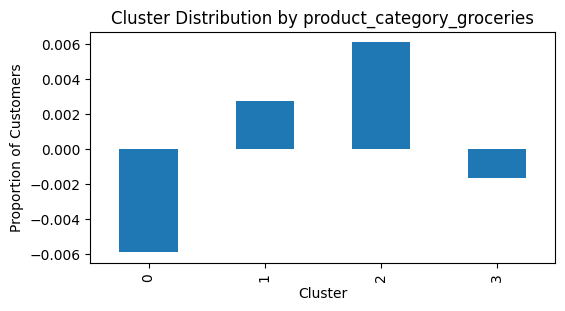

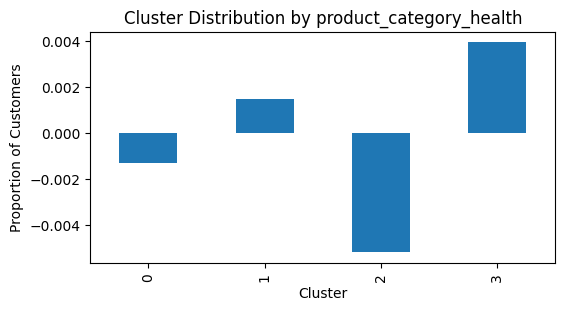

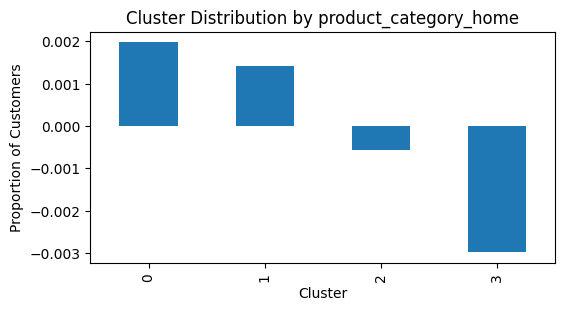

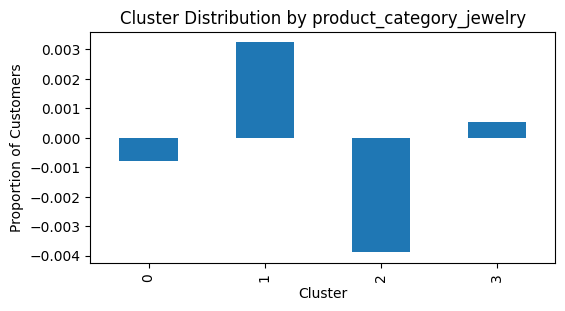

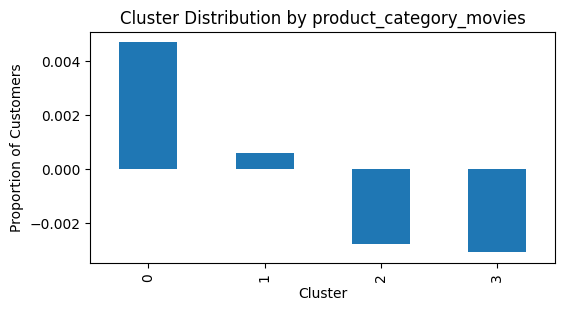

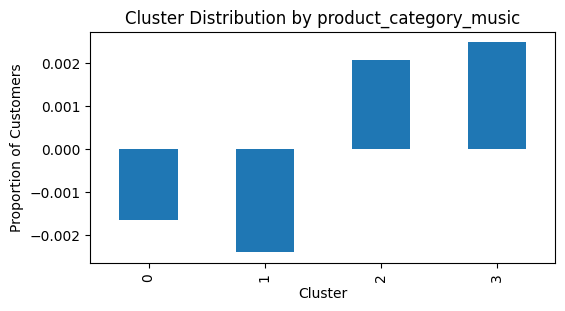

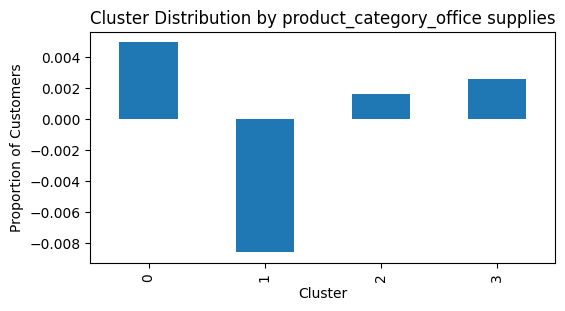

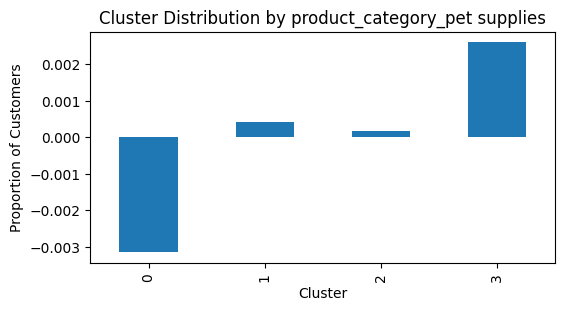

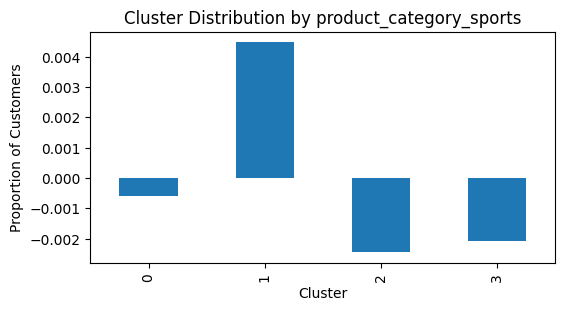

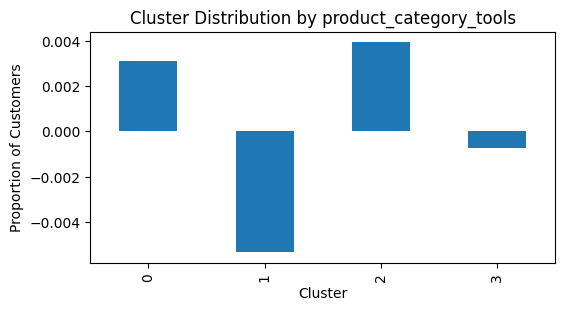

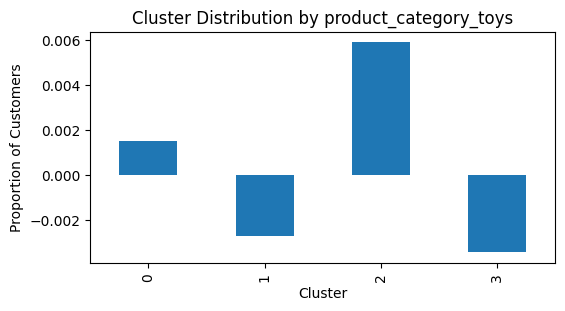

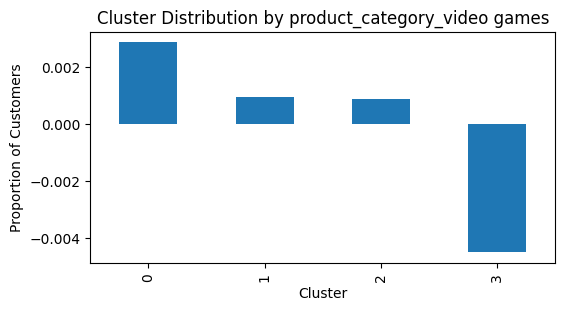

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 1. Cluster Sizes
# ==============================
print("=== Cluster Sizes (Counts) ===")
print(df_scaled['Cluster'].value_counts())

print("\n=== Cluster Sizes (%) ===")
print(df_scaled['Cluster'].value_counts(normalize=True) * 100)

# ==============================
# 2. Numerical Feature Summary
# ==============================
num_features = [
    'age',
    'loyalty_points_redeemed',
    'loyalty_tier',
    'card_discount_percentage',
    'coupon_discount_percentage',
    'total_discount_percentage',
    'total_purchase_after_discount',
    'total_delivery_days',
    'shipping_cost',
    'customer_exp_rating',
    'membership_duration_days',
    'delivery_time_days',
    'estimated_vs_actual_delivery'
]

num_summary = df_scaled.groupby('Cluster')[num_features].mean()
print("\n=== Numerical Summary ===")
display(num_summary)

# ==============================
# 3. Categorical Feature Summary
# ==============================
categorical_features = [
    'sex', 
    'purchase_medium', 
    'shipping_method',
    'loyalty_program_member'
]

cat_summary = {}
for col in categorical_features:
    cat_summary[col] = df_scaled.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0)
    print(f"\n=== {col} ===")
    display(cat_summary[col])

# ==============================
# 4. One-Hot Encoded Features (Payment & Product Category)
# ==============================
onehot_features = [col for col in df_scaled.columns if col.startswith("payment_method_") or col.startswith("product_category_")]

onehot_summary = df_scaled.groupby("Cluster")[onehot_features].mean()
print("\n=== One-Hot Encoded Feature Summary (Proportions) ===")
display(onehot_summary)

# ==============================
# 5. Visualization - Numerical Features
# ==============================
plt.figure(figsize=(14,6))
sns.heatmap(num_summary, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Cluster Profiling - Numerical Features", fontsize=14, fontweight="bold")
plt.show()

# ==============================
# 6. Visualization - Categorical Features
# ==============================
for col, summary in cat_summary.items():
    summary.plot(kind='bar', stacked=True, figsize=(8,4), title=f"Cluster Distribution by {col}")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# ==============================
# 7. Visualization - Payment & Product Categories
# ==============================
for col in onehot_features:
    cluster_means = df_scaled.groupby("Cluster")[col].mean()
    cluster_means.plot(kind="bar", figsize=(6,3), title=f"Cluster Distribution by {col}")
    plt.ylabel("Proportion of Customers")
    plt.show()


In [67]:
# Step 1: Map cluster numbers to meaningful names
cluster_names = {
    0: "High-Spending Loyalists",
    1: "New/Exploring Members",
    2: "Low-Engagement Casual Shoppers",
    3: "Discount-Driven Bargain Hunters"
}

# Create a new column with descriptive names
df_scaled['Cluster_Name'] = df_scaled['Cluster'].map(cluster_names)

# Step 2: Validate with business objective
print("✅ Objective: Customer segmentation for personalized marketing, loyalty optimization, and churn reduction.")
print("✅ Each cluster is linked to a clear actionable strategy.\n")

# Step 3: Generate insights & recommendations
cluster_recommendations = {
    "High-Spending Loyalists": {
        "Characteristics": "High loyalty tier, high points redeemed, longer membership duration, high spend.",
        "Strategy": "Offer exclusive VIP perks, early access to sales, premium experiences to retain them."
    },
    "New/Exploring Members": {
        "Characteristics": "Recently joined, low loyalty activity, moderate purchases.",
        "Strategy": "Run onboarding campaigns, welcome offers, nurture with guided shopping journeys."
    },
    "Low-Engagement Casual Shoppers": {
        "Characteristics": "Low loyalty membership, low spending, weak engagement.",
        "Strategy": "Increase engagement with push notifications, personalized product recommendations, gamified rewards."
    },
    "Discount-Driven Bargain Hunters": {
        "Characteristics": "Strong interest in discounts/coupons, lower loyalty participation.",
        "Strategy": "Target with flash sales, coupon campaigns, referral bonuses to drive repeat purchases."
    }
}

# Step 4: Display recommendations in a nice summary
import pandas as pd

recommendations_df = pd.DataFrame([
    {"Cluster": cluster, 
     "Characteristics": details["Characteristics"], 
     "Recommended Strategy": details["Strategy"]}
    for cluster, details in cluster_recommendations.items()
])

print("\n=== Final Cluster Insights & Recommendations ===")
display(recommendations_df)


✅ Objective: Customer segmentation for personalized marketing, loyalty optimization, and churn reduction.
✅ Each cluster is linked to a clear actionable strategy.


=== Final Cluster Insights & Recommendations ===


,Cluster,Characteristics,Recommended Strategy
0,High-Spending Loyalists,"High loyalty tier, high points redeemed, longe...","Offer exclusive VIP perks, early access to sal..."
1,New/Exploring Members,"Recently joined, low loyalty activity, moderat...","Run onboarding campaigns, welcome offers, nurt..."
2,Low-Engagement Casual Shoppers,"Low loyalty membership, low spending, weak eng...","Increase engagement with push notifications, p..."
3,Discount-Driven Bargain Hunters,"Strong interest in discounts/coupons, lower lo...","Target with flash sales, coupon campaigns, ref..."
